In [41]:
"""
Retrieves tweets from database, only keep the ones that are about covid and were not coded, in the given period.
"""

import sys, os

sys.path.append(os.path.abspath(os.path.join("..", "src")))

%load_ext autoreload
%autoreload 2
import re
import time

import matplotlib
import pandas as pd
import numpy as np
from tqdm import tqdm

tqdm.pandas()

from common.database import Database
from common.app import App
from common.helpers import Helpers

app_run = App(debug=True)
db = Database("tweets.db", app=app_run)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
def convert_date(datestr):
    datestr = datestr.split(" ")[0]
    datestr = datestr.replace("-", "/")

    # If US format (2020/04/01), convert to EU
    datestr_split = datestr.split("/")
    if len(datestr_split[0]) == 4:
        return "/".join(datestr_split[::-1])
    return datestr

In [4]:
with db:
    tws = db.get_all_tweets()
print(len(tws))
df_all = Helpers.df_from_db(tws)

240375


In [15]:
# get only tweets about covid that are NOT coded
df_yes = df_all[(df_all["covid_theme"] == 1) & ~(df_all["theme_hardcoded"] == "0")]
df = df_yes[
    ~(df_yes["topic"].isin(Helpers.topics_cov))
    & ~(df_yes["topic"].isin(Helpers.topics_not_cov))
].copy()

In [19]:
# Convert date to be handled
df["date"] = df["created_at"].apply(convert_date)
df["date"] = pd.to_datetime(df["date"], format="%d/%m/%Y")

In [21]:
start = "31/12/2019"
end = "01/04/2021"

df_sorted = df[
    (df["date"] > pd.to_datetime(start, format="%d/%m/%Y"))
    & (df["date"] < pd.to_datetime(end, format="%d/%m/%Y"))
]
df_sorted  # 13_138 tweets

,tweet_id,covid_theme,created_at,handle,name,old_text,text,url,type,retweets,favorites,topic,subcat,position,frame,theme_hardcoded,date
107,1212455197986787328,1,01/01/2020 19:27:00,@NHSuk,NHS,None,Have you set up the emergency medical features...,https://twitter.com/NHSuk/status/1212455197986...,New,122.0,113.0,NaN,NaN,NaN,NaN,None,2020-01-01
459,1215572600786649088,1,10/01/2020 09:54:26,@francediplo,France Diplomatie🇫🇷,None,« Une équipe de 5 experts 🇫🇷 de la lutte contr...,https://twitter.com/francediplo/status/1215572...,New,49.0,122.0,NaN,NaN,NaN,NaN,None,2020-01-10
487,1215665459019833346,1,10/01/2020 16:03:26,@NHSuk,NHS,None,Have you set up the emergency medical features...,https://twitter.com/NHSuk/status/1215665459019...,New,128.0,94.0,NaN,NaN,NaN,NaN,None,2020-01-10
504,1215755146338193408,1,10/01/2020 21:59:49,@EmmanuelMacron,Emmanuel Macron,None,Plastique : comment permettre au secteur de s’...,https://twitter.com/EmmanuelMacron/status/1215...,New,828.0,3844.0,NaN,NaN,NaN,NaN,None,2020-01-10
636,1217023290050375680,1,14/01/2020 09:58:58,@WHOSEARO,WHO South-East Asia,RT @WHOThailand: Thailand responding to the no...,Thailand responding to the novel coronavirus\n...,https://twitter.com/WHOSEARO/status/1217023290...,Retweet,21.0,0.0,NaN,NaN,NaN,NaN,None,2020-01-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235756,1215325442988744704,1,09/01/2020 17:32:19,@WHO,World Health Organization (WHO),"Some coronaviruses cause less-severe disease, ...","Some coronaviruses cause less-severe disease, ...",https://twitter.com/WHO/status/121532544298874...,Reply,42.0,82.0,NaN,NaN,NaN,NaN,None,2020-01-09
235826,1213813207162376192,1,05/01/2020 13:23:14,@WHO,World Health Organization (WHO),RT @opsomsuruguay: La #LactanciaMaterna es la ...,La #LactanciaMaterna es la forma ideal de apor...,https://twitter.com/WHO/status/121381320716237...,Retweet,21.0,0.0,NaN,NaN,NaN,NaN,None,2020-01-05
235832,1213795239464493056,1,05/01/2020 12:11:50,@WHO,World Health Organization (WHO),WHO’s recommendations on public health measure...,WHO’s recommendations on public health measure...,https://twitter.com/WHO/status/121379523946449...,Reply,68.0,80.0,NaN,NaN,NaN,NaN,None,2020-01-05
235847,1213385437311619073,1,04/01/2020 09:03:26,@WHO,World Health Organization (WHO),RT @ONU_fr: Prenez soin de votre santé mentale...,Prenez soin de votre santé mentale en :\n\n💪 f...,https://twitter.com/WHO/status/121338543731161...,Retweet,109.0,0.0,NaN,NaN,NaN,NaN,None,2020-01-04


In [75]:
print(df_sorted["handle"].value_counts())

Index(['@WHO', '@DHSCgovuk', '@BAG_OFSP_UFSP', '@gouvernementFR',
       '@BR_Sprecher', '@EUHomeAffairs', '@WHOSEARO', '@EDI_DFI', '@DrTedros',
       '@NHSuk', '@EU_Health', '@EDA_DFAE', '@LesVertsSuisses',
       '@Mitte_Centre', '@UN', '@PLR_Suisse', '@alain_berset',
       '@EJPD_DFJP_DFGP', '@lesRepublicains', '@EU_Commission',
       '@socialistesAN', '@LibDems', '@FCDOGovUK', '@ukhomeoffice', '@ECDC_EU',
       '@MoDem', '@WHO_Europe', '@eu_eeas', '@enmarchefr', '@francediplo',
       '@FranceInsoumise', '@UDCch', '@10DowningStreet', '@RenewEurope',
       '@Conservatives', '@TheProgressives', '@PSSuisse', '@vonderleyen',
       '@UKLabour', '@RNational_off', '@s_sommaruga', '@EPPGroup',
       '@ignaziocassis', '@GreensEFA', '@cabinetofficeuk', '@EUCouncil',
       '@Interieur_Gouv', '@fedpolCH', '@RishiSunak', '@JeanCASTEX',
       '@vertliberaux', '@BorisJohnson', '@antonioguterres',
       '@PoliceNationale', '@Europol', '@eucopresident', '@EmmanuelMacron',
       '@reformp

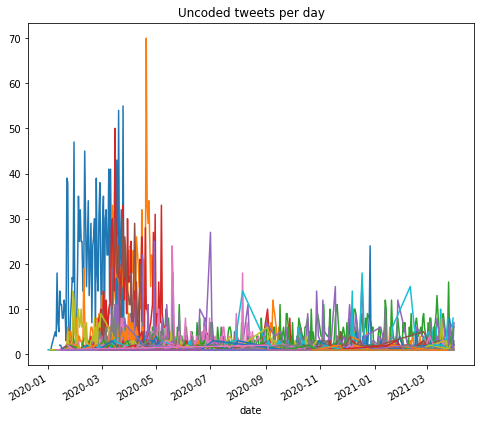

In [82]:
# Some plots
for actor in df_sorted["handle"].value_counts().index:
    counts = df_sorted[df_sorted["handle"]==actor].groupby(["date"]).count()["tweet_id"]
    counts_handle = df_sorted.groupby(["date", "handle"]).count()["tweet_id"]

    counts.plot(figsize=(8, 7)).set_title(f"Uncoded tweets per day");


In [69]:
df_sorted[df_sorted["handle"]=="@DHSCgovuk"]

,tweet_id,covid_theme,created_at,handle,name,old_text,text,url,type,retweets,favorites,topic,subcat,position,frame,theme_hardcoded,date
21010,1304502471897776128,1,11/09/2020 19:30:00,@DHSCgovuk,Department of Health and Social Care,None,The @NHSCOVID19app will be available nationall...,https://twitter.com/DHSCgovuk/status/130450247...,New,37.0,57.0,NaN,NaN,NaN,NaN,None,2020-09-11
21967,1305782153137942531,1,15/09/2020 08:15:00,@DHSCgovuk,Department of Health and Social Care,None,"When wearing a face covering, remember:\n\n❌ D...",https://twitter.com/DHSCgovuk/status/130578215...,New,90.0,89.0,NaN,NaN,NaN,NaN,None,2020-09-15
22277,1305883750245576705,1,15/09/2020 14:58:42,@DHSCgovuk,Department of Health and Social Care,"RT @DHSCgovuk: When wearing a face covering, r...","When wearing a face covering, remember:\n\n❌ D...",https://twitter.com/DHSCgovuk/status/130588375...,Retweet,90.0,0.0,NaN,NaN,NaN,NaN,None,2020-09-15
22761,1306194872789917696,1,16/09/2020 11:35:00,@DHSCgovuk,Department of Health and Social Care,None,All frontline health &amp; social care workers...,https://twitter.com/DHSCgovuk/status/130619487...,New,54.0,60.0,NaN,NaN,NaN,NaN,None,2020-09-16
22854,1306238023391227904,1,16/09/2020 14:26:28,@DHSCgovuk,Department of Health and Social Care,RY @PickardJE: @PickardJE @ChrisGiles_ The fig...,@PickardJE @ChrisGiles_ The figures shared by ...,https://twitter.com/DHSCgovuk/status/130623802...,Reply,8.0,34.0,NaN,NaN,NaN,NaN,None,2020-09-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224283,1220079526711111682,1,22/01/2020 20:23:21,@DHSCgovuk,Department of Health and Social Care,RT @DHSCgovuk: We're working with @PHE_uk and ...,We're working with @PHE_uk and @NHSEngland to ...,https://twitter.com/DHSCgovuk/status/122007952...,Retweet,80.0,0.0,NaN,NaN,NaN,NaN,None,2020-01-22
224288,1219975309057036291,1,22/01/2020 13:29:14,@DHSCgovuk,Department of Health and Social Care,None,We're working with @PHE_uk and @NHSEngland to ...,https://twitter.com/DHSCgovuk/status/121997530...,New,80.0,70.0,NaN,NaN,NaN,NaN,None,2020-01-22
224294,1219613113361690624,1,21/01/2020 13:30:00,@DHSCgovuk,Department of Health and Social Care,None,Did you know that the flu virus can live on ha...,https://twitter.com/DHSCgovuk/status/121961311...,New,21.0,17.0,NaN,NaN,NaN,NaN,None,2020-01-21
224335,1217144349437222912,1,14/01/2020 18:00:01,@DHSCgovuk,Department of Health and Social Care,None,Did you know that the flu virus can live on ha...,https://twitter.com/DHSCgovuk/status/121714434...,New,8.0,6.0,NaN,NaN,NaN,NaN,None,2020-01-14


In [31]:
df_sorted.to_excel("database/xlsx/missing.xlsx", index=False)